In [1]:
documents = ["Ashraf Marwan is remembered most famously for spying for the Egyptian intelligence agency",
             "Marwan started working in the Presidential Office under Sami Sharaf",
             "Marwan has passed many sensetive information to Irsaeli agency",
             "feeding Egypt strategic information on the location of Israeli military assets",
             "Whether for love of humanity or the mighty dollar Ashraf Marwan warned the Mossad about the planned Arab surprise attack that started the Yom Kippur War saving millions",
             "Marwan spied for Israel under the Mossad code-name The Angel",
             "Marwan unparalleled access to his nations best kept secrets especially after his promotion",
             "after Sadat assassination Marwan left Egypt and started a business career in London",
             "Marwan gained a reputation as a mysterious man who did not play according to the rules of the City"]

In [2]:
# stop_words = ['a', 'be', 'is', 'of', 'the', 'for', 'to', 'on', 'his','did', 'not', 'or', 'as']
stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
sentences = []
for text in documents:
    text = text.lower()
    tmp = text.split(" ")
    text_clean = [w for w in tmp if not w in stop_words]
    sentences.append(" ".join(text_clean))
    

words = []
for docs in sentences:
    tokenized = docs.split()
    for token_words in tokenized:
        if not token_words in stop_words:
            words.append(token_words)        

# unique words in corpus
unique_words = set(words)

In [3]:
sentences

['ashraf marwan remembered famously spying egyptian intelligence agency',
 'marwan started working presidential office sami sharaf',
 'marwan passed many sensetive information irsaeli agency',
 'feeding egypt strategic information location israeli military assets',
 'whether love humanity mighty dollar ashraf marwan warned mossad planned arab surprise attack started yom kippur war saving millions',
 'marwan spied israel mossad code-name angel',
 'marwan unparalleled access nations best kept secrets especially promotion',
 'sadat assassination marwan left egypt started business career london',
 'marwan gained reputation mysterious man play according rules city']

In [4]:
unique_words

{'access',
 'according',
 'agency',
 'angel',
 'arab',
 'ashraf',
 'assassination',
 'assets',
 'attack',
 'best',
 'business',
 'career',
 'city',
 'code-name',
 'dollar',
 'egypt',
 'egyptian',
 'especially',
 'famously',
 'feeding',
 'gained',
 'humanity',
 'information',
 'intelligence',
 'irsaeli',
 'israel',
 'israeli',
 'kept',
 'kippur',
 'left',
 'location',
 'london',
 'love',
 'man',
 'many',
 'marwan',
 'mighty',
 'military',
 'millions',
 'mossad',
 'mysterious',
 'nations',
 'office',
 'passed',
 'planned',
 'play',
 'presidential',
 'promotion',
 'remembered',
 'reputation',
 'rules',
 'sadat',
 'sami',
 'saving',
 'secrets',
 'sensetive',
 'sharaf',
 'spied',
 'spying',
 'started',
 'strategic',
 'surprise',
 'unparalleled',
 'war',
 'warned',
 'whether',
 'working',
 'yom'}

In [5]:
# assigning word int value
idx = 1
word_ids = {}
for idx, val in enumerate(unique_words):
    word_ids[val] = idx    # if not +1 we'll get first element be 0           

In [7]:
# sentences

In [8]:
word_ids

{'mighty': 0,
 'egyptian': 1,
 'city': 2,
 'rules': 3,
 'many': 4,
 'millions': 5,
 'kept': 6,
 'according': 7,
 'information': 8,
 'london': 9,
 'egypt': 10,
 'israeli': 11,
 'nations': 12,
 'humanity': 13,
 'dollar': 14,
 'love': 15,
 'arab': 16,
 'location': 17,
 'sadat': 18,
 'intelligence': 19,
 'military': 20,
 'started': 21,
 'access': 22,
 'mysterious': 23,
 'play': 24,
 'career': 25,
 'remembered': 26,
 'business': 27,
 'man': 28,
 'assets': 29,
 'angel': 30,
 'code-name': 31,
 'assassination': 32,
 'reputation': 33,
 'unparalleled': 34,
 'famously': 35,
 'sensetive': 36,
 'warned': 37,
 'attack': 38,
 'gained': 39,
 'sharaf': 40,
 'war': 41,
 'passed': 42,
 'spied': 43,
 'presidential': 44,
 'planned': 45,
 'kippur': 46,
 'especially': 47,
 'secrets': 48,
 'promotion': 49,
 'feeding': 50,
 'strategic': 51,
 'spying': 52,
 'surprise': 53,
 'mossad': 54,
 'left': 55,
 'yom': 56,
 'agency': 57,
 'ashraf': 58,
 'office': 59,
 'irsaeli': 60,
 'israel': 61,
 'marwan': 62,
 'working

In [9]:
# Getting labels/Neighbours using skip gram 
main_word = []
lb_word = []   # neighbour word

WINDOW_SIZE = 4
# print(sentences)

tok_sentences = []
for wrds in sentences:
    tok_sentences.append(wrds.split())

for sentence in tok_sentences:
    # print(sentence)
    for word_index, word in enumerate(sentence):
        for nb_word in sentence[max(word_index - WINDOW_SIZE, 0) : min(word_index + WINDOW_SIZE, len(sentence)) + 1] :    
            if nb_word != word:
                main_word.append(word)
                lb_word.append(nb_word)
                
                

In [10]:
list(zip(main_word, lb_word))

[('ashraf', 'marwan'),
 ('ashraf', 'remembered'),
 ('ashraf', 'famously'),
 ('ashraf', 'spying'),
 ('marwan', 'ashraf'),
 ('marwan', 'remembered'),
 ('marwan', 'famously'),
 ('marwan', 'spying'),
 ('marwan', 'egyptian'),
 ('remembered', 'ashraf'),
 ('remembered', 'marwan'),
 ('remembered', 'famously'),
 ('remembered', 'spying'),
 ('remembered', 'egyptian'),
 ('remembered', 'intelligence'),
 ('famously', 'ashraf'),
 ('famously', 'marwan'),
 ('famously', 'remembered'),
 ('famously', 'spying'),
 ('famously', 'egyptian'),
 ('famously', 'intelligence'),
 ('famously', 'agency'),
 ('spying', 'ashraf'),
 ('spying', 'marwan'),
 ('spying', 'remembered'),
 ('spying', 'famously'),
 ('spying', 'egyptian'),
 ('spying', 'intelligence'),
 ('spying', 'agency'),
 ('egyptian', 'marwan'),
 ('egyptian', 'remembered'),
 ('egyptian', 'famously'),
 ('egyptian', 'spying'),
 ('egyptian', 'intelligence'),
 ('egyptian', 'agency'),
 ('intelligence', 'remembered'),
 ('intelligence', 'famously'),
 ('intelligence', '

# creating one layer neural network 

In [11]:
import tensorflow as tf
import numpy as np

ONE_HOT_DIM = len(unique_words)

def get_one_hot(key):
    array = [0]*ONE_HOT_DIM
    array[word_ids[key]] = 1
    return array

# print(get_one_hot('egyptian'))

X = [] # input word
Y = [] # target word

for x,y  in zip(main_word, lb_word):
    X.append(get_one_hot(x))
    Y.append(get_one_hot(y))
    
X_train = np.asarray(X)
Y_train = np.asarray(Y)

In [12]:
# making placeholders for X_train and Y_train
x = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))
y_label = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))

# word embedding will be 2 dimension for 2d visualization
EMBEDDING_DIM = 2 

# hidden layer: which represents word vector eventually
W1 = tf.Variable(tf.random_normal([ONE_HOT_DIM, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([1])) #bias
hidden_layer = tf.add(tf.matmul(x,W1), b1)

# output layer
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, ONE_HOT_DIM]))
b2 = tf.Variable(tf.random_normal([1]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_layer, W2), b2))

# loss function: cross entropy
loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), axis=[1]))

# training operation
train_op = tf.train.GradientDescentOptimizer(0.03).minimize(loss)

In [13]:

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) 

iteration = 50000
for i in range(iteration):
    # input is X_train which is one hot encoded word
    # label is Y_train which is one hot encoded neighbor word
    sess.run(train_op, feed_dict={x: X_train, y_label: Y_train})
    if i % 5000 == 0:
        print('iteration '+str(i)+' loss is : ', sess.run(loss, feed_dict={x: X_train, y_label: Y_train}))

iteration 0 loss is :  5.235149
iteration 5000 loss is :  3.8667817
iteration 10000 loss is :  3.5051537
iteration 15000 loss is :  3.3688247
iteration 20000 loss is :  3.2986794
iteration 25000 loss is :  3.24838
iteration 30000 loss is :  3.210482
iteration 35000 loss is :  3.1797242
iteration 40000 loss is :  3.1549296
iteration 45000 loss is :  3.1352532


In [14]:
# Now the hidden layer (W1 + b1) is actually the word look up table
vectors = sess.run(W1 + b1)
print(vectors)

[[-1.1396012   0.51805204]
 [ 0.41125566 -0.8668661 ]
 [-2.5068724  -3.0399034 ]
 [-2.5397494  -3.1241653 ]
 [ 0.6722935  -1.4016938 ]
 [-3.15414     0.9480453 ]
 [-0.2864316  -4.2004514 ]
 [-2.6474168  -3.306808  ]
 [ 0.6022604  -0.24670172]
 [-2.8781066  -0.3569875 ]
 [ 0.03123873 -0.10599905]
 [ 0.8179652   0.02390862]
 [-0.79523253 -3.5976784 ]
 [-1.1864489   0.47964936]
 [-1.1980035   0.6624424 ]
 [-1.0050113   0.713438  ]
 [-3.69199     1.45677   ]
 [ 0.8144588   0.02383679]
 [-3.6389248  -1.0270689 ]
 [ 1.0164964  -1.4769236 ]
 [ 3.0756197  -0.03089529]
 [-1.2412274   0.4468444 ]
 [-0.93626    -3.7397919 ]
 [-3.0390532  -3.2678702 ]
 [-2.4827287  -3.0525374 ]
 [-3.230937   -0.42921707]
 [ 0.19617051 -0.4222816 ]
 [-3.9581609  -0.6292579 ]
 [-2.8844135  -3.185123  ]
 [ 3.1364045  -0.58881307]
 [ 0.38727933  1.6132965 ]
 [ 0.13053691  0.73914415]
 [-3.5737705  -0.6295398 ]
 [-3.1453173  -3.2888346 ]
 [-1.0192558  -3.6775198 ]
 [ 0.23985642 -0.48481542]
 [ 0.7123007  -1.5549865 ]
 

In [16]:
import pandas as pd
w2v_df = pd.DataFrame(vectors, columns = ['x1', 'x2'])
w2v_df['word'] = unique_words
w2v_df = w2v_df[['word', 'x1', 'x2']]
w2v_df

,word,x1,x2
0,mighty,-1.139601,0.518052
1,egyptian,0.411256,-0.866866
2,city,-2.506872,-3.039903
3,rules,-2.539749,-3.124165
4,many,0.672293,-1.401694
5,millions,-3.154140,0.948045
6,kept,-0.286432,-4.200451
7,according,-2.647417,-3.306808
8,information,0.602260,-0.246702
9,london,-2.878107,-0.356988


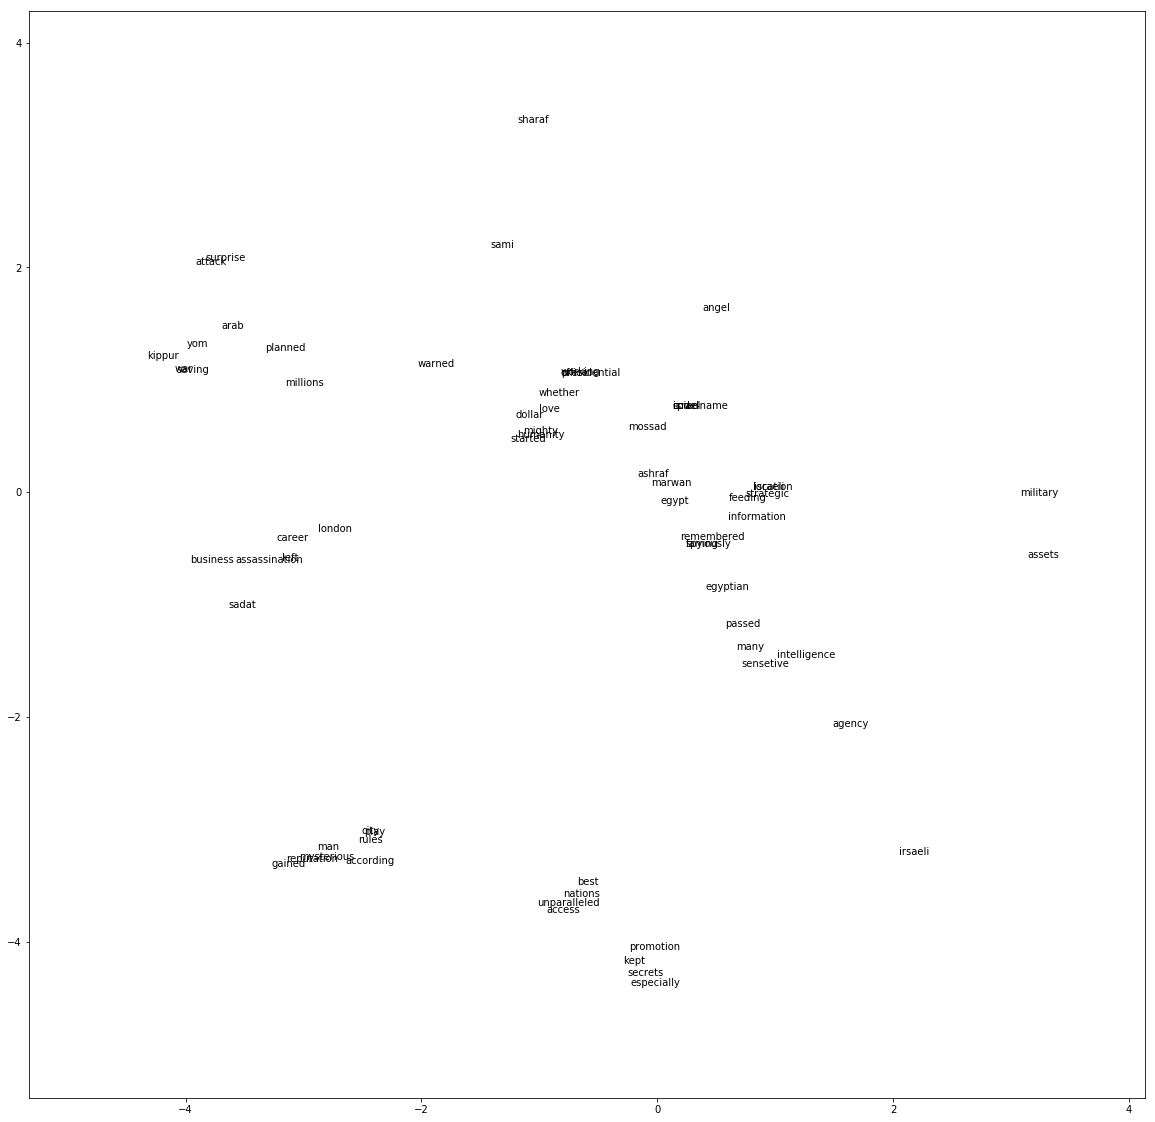

In [19]:
import matplotlib.pyplot as plt
#%matplotlib inline
fig, ax = plt.subplots()

for word, x1, x2 in zip(w2v_df['word'], w2v_df['x1'], w2v_df['x2']):
    ax.annotate(word, (x1,x2 ))
    
PADDING = 1.0
x_axis_min = np.amin(vectors, axis=0)[0] - PADDING
y_axis_min = np.amin(vectors, axis=0)[1] - PADDING
x_axis_max = np.amax(vectors, axis=0)[0] + PADDING
y_axis_max = np.amax(vectors, axis=0)[1] + PADDING
 
plt.xlim(x_axis_min,x_axis_max)
plt.ylim(y_axis_min,y_axis_max)
plt.rcParams["figure.figsize"] = (20,20)

plt.show()
